    fluxmode:
      High Flux (HF)    = 9.0 deg
      Intermidiste (AI) = 4.4 deg
      High Res (HR)     = 2.0 deg
    Frequency DoubleDisk Chopper 1: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR
    Frequency DoubleDisk Chopper 2: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR


In [3]:
workdir = '~/dv/sns-chops/resolution/CNCS/mcvine'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine


In [4]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

import histogram.hdf as hh, histogram as H
import mcvine, mcvine.components
from mcni.utils import conversion as C

from matplotlib import pyplot as plt
%matplotlib notebook

import mcvine, mcvine.components as mcomps
from mcvine import run_script

from mantid import simpleapi as msa

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


# Instrument sim script

This is already done in ./mcvine beam - check monitors.ipynb

# Ei=1meV high resolution

In [3]:
beamdir = os.path.abspath("Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0")
#!rm -rf {beamdir}
!mkdir -p {beamdir}

run_script.run1(
    './CNCS_Dec_2016_py_mcvine.py', 
    workdir='debug', ncount=100, 
    Ei=1, Erange_fraction=0.07,
    fluxmode=2.0, f41=180., f42=180.,
    overwrite_datafiles=True)

In [9]:
%%time
!rm -rf {beamdir}/*
run_script.run_mpi(
    './CNCS_Dec_2016_py_mcvine.py', 
    '%s/_m2sout' % beamdir,
    ncount=1e9, nodes=20,
    Ei=1, Erange_fraction=0.035,
    fluxmode=2.0, f41=180., f42=180.,
)

CPU times: user 114 ms, sys: 90.6 ms, total: 205 ms
Wall time: 1h 6min 42s


In [10]:
!mcvine neutronstorage count {beamdir}/_m2sout/neutrons

42234


<IPython.core.display.Javascript object>


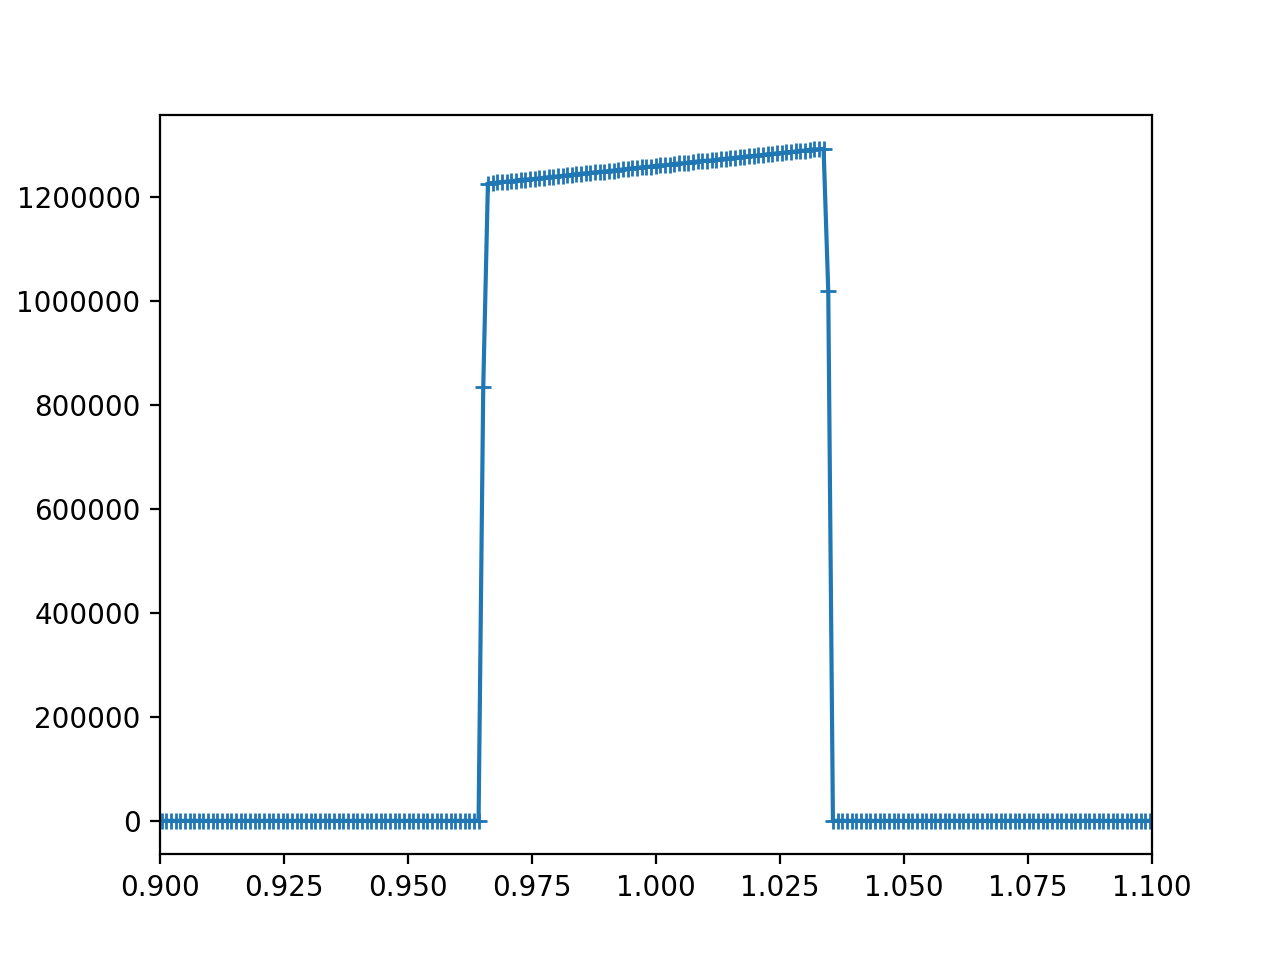

(0.9, 1.1)

In [11]:
plt.figure()
IE = hh.load('%s/_m2sout/E_mon_0.h5' % beamdir)
plt.plot(IE.energy, IE.I, '+-')
plt.xlim(0.9, 1.1)

Run postprocessing so that this works with other apps such as resolution calculation

In [12]:
from mcvine.instruments.CNCS import beam_postprocessing as bpp

In [13]:
bpp.run(
    '%s/_m2sout/' % beamdir, 
    '%s/out' % beamdir,
    Ei=1.
)

Running beam monitors...
 -> running mcvine_analyze_beam --output-dir=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/out --ncount=42234 --buffer_size=42234 --geometer.source="((0,0,-0.15),(0,0,0))" --source.path=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/neutrons --monitor.mtof.tofmin=0.074618424598458 --monitor.mtof.tofmax=0.09120029673144867 --monitor.mtof.ntof=1000 --monitor.menergy.energymin=0.9 --monitor.menergy.energymax=1.1 --monitor.menergy.nenergy=1000...
done.


<IPython.core.display.Javascript object>


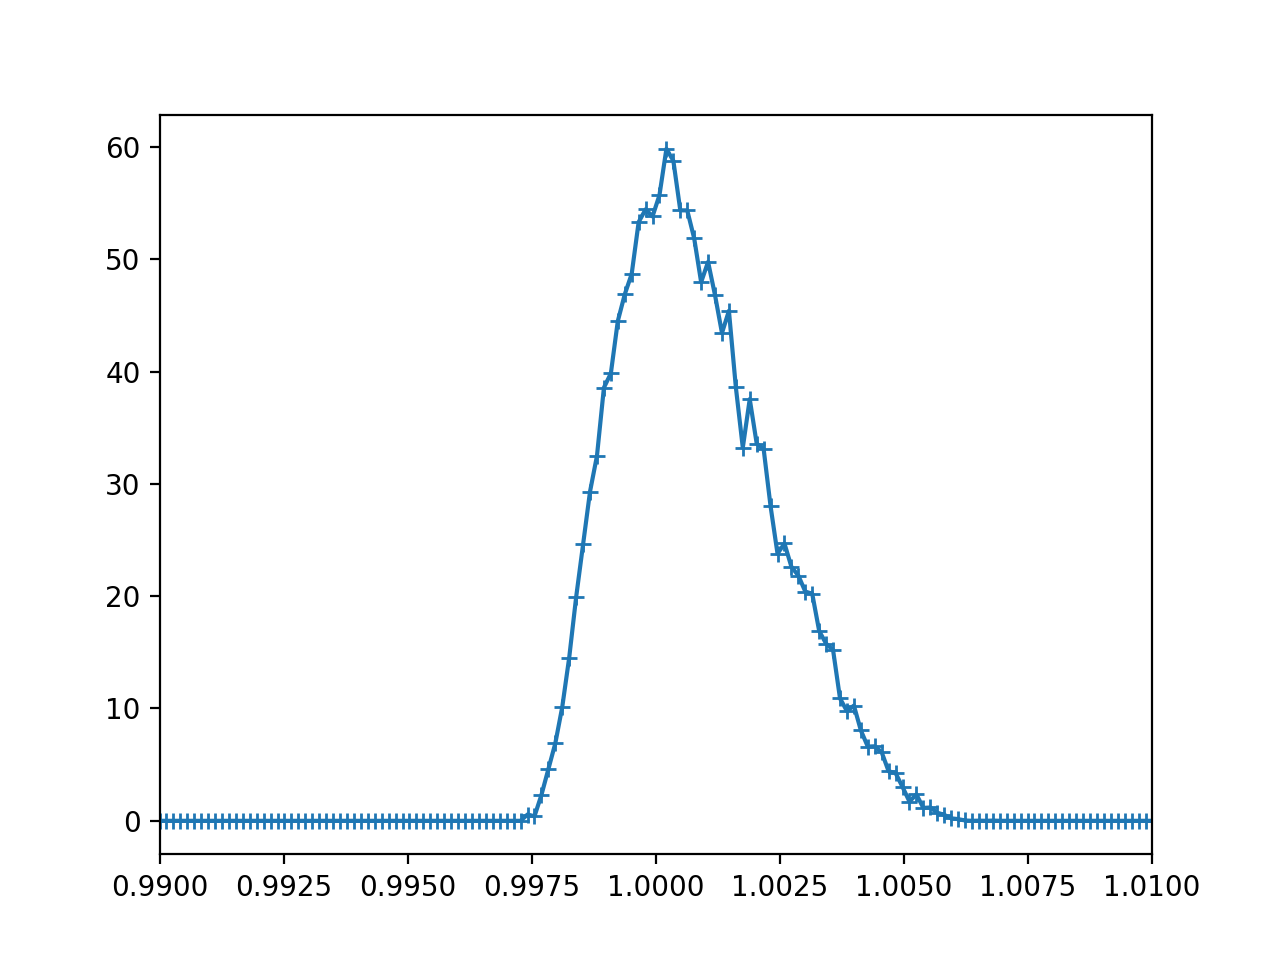

(0.99, 1.01)

In [14]:
plt.figure()
IE = hh.load('%s/_m2sout/beam_I_E.h5' % beamdir)
plt.plot(IE.energy, IE.I, '+-')
plt.xlim(0.99, 1.01)

<IPython.core.display.Javascript object>


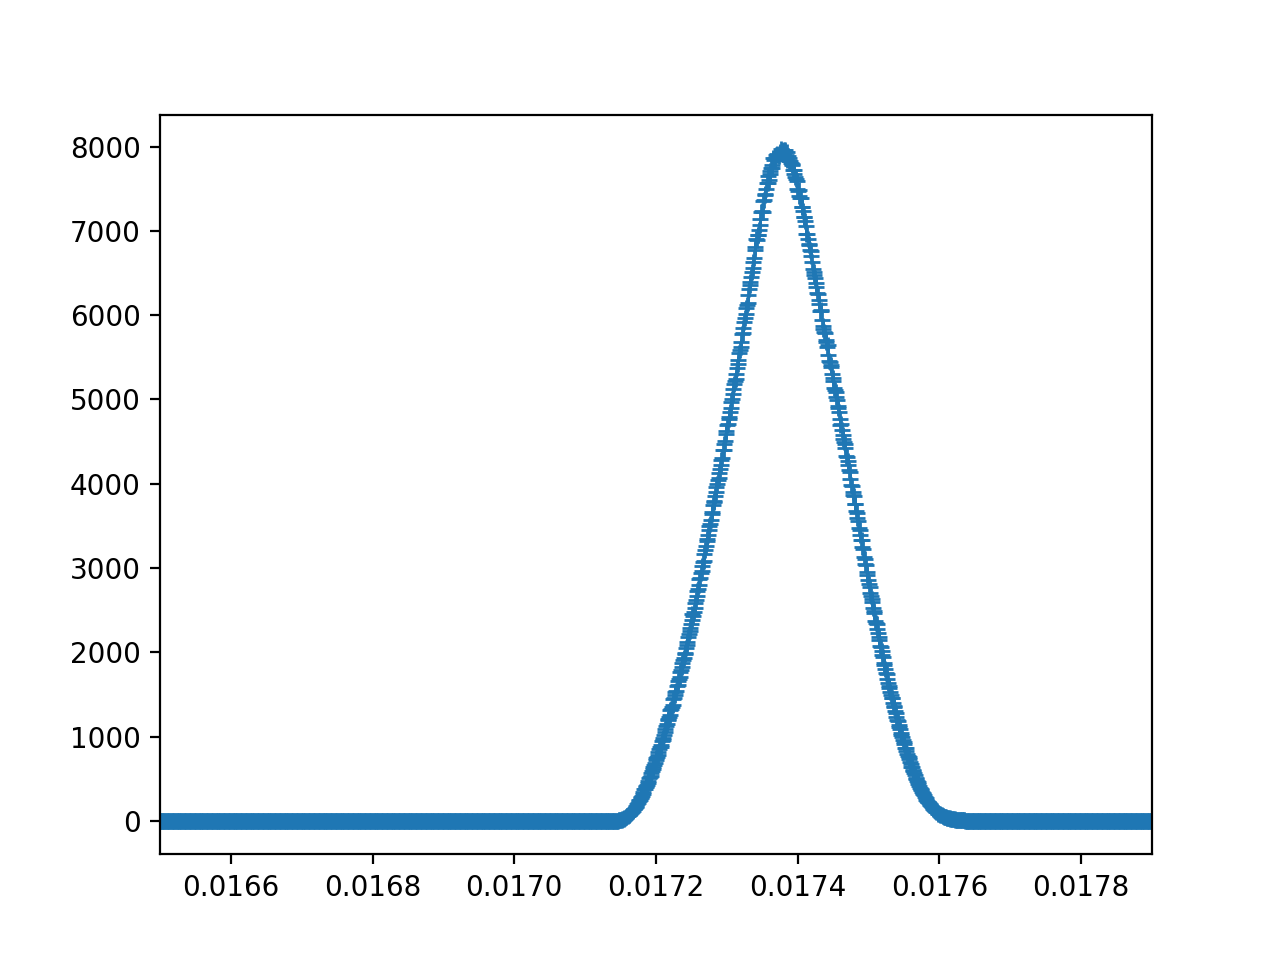

(0.0165, 0.0179)

In [15]:
plt.figure()
m2 = hh.load('%s/_m2sout/tof2.h5' % beamdir)
plt.plot(m2.tof, m2.I, '+')
plt.xlim(0.0165, 0.0179)

In [22]:
ls {beamdir}/_m2sout/*.h5

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/beam_I_E.h5
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/E_mon_0.h5
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof1b.h5
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof2.h5
/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_1meV_AnalyticMod_MoreCounts/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof3a.h5


<IPython.core.display.Javascript object>


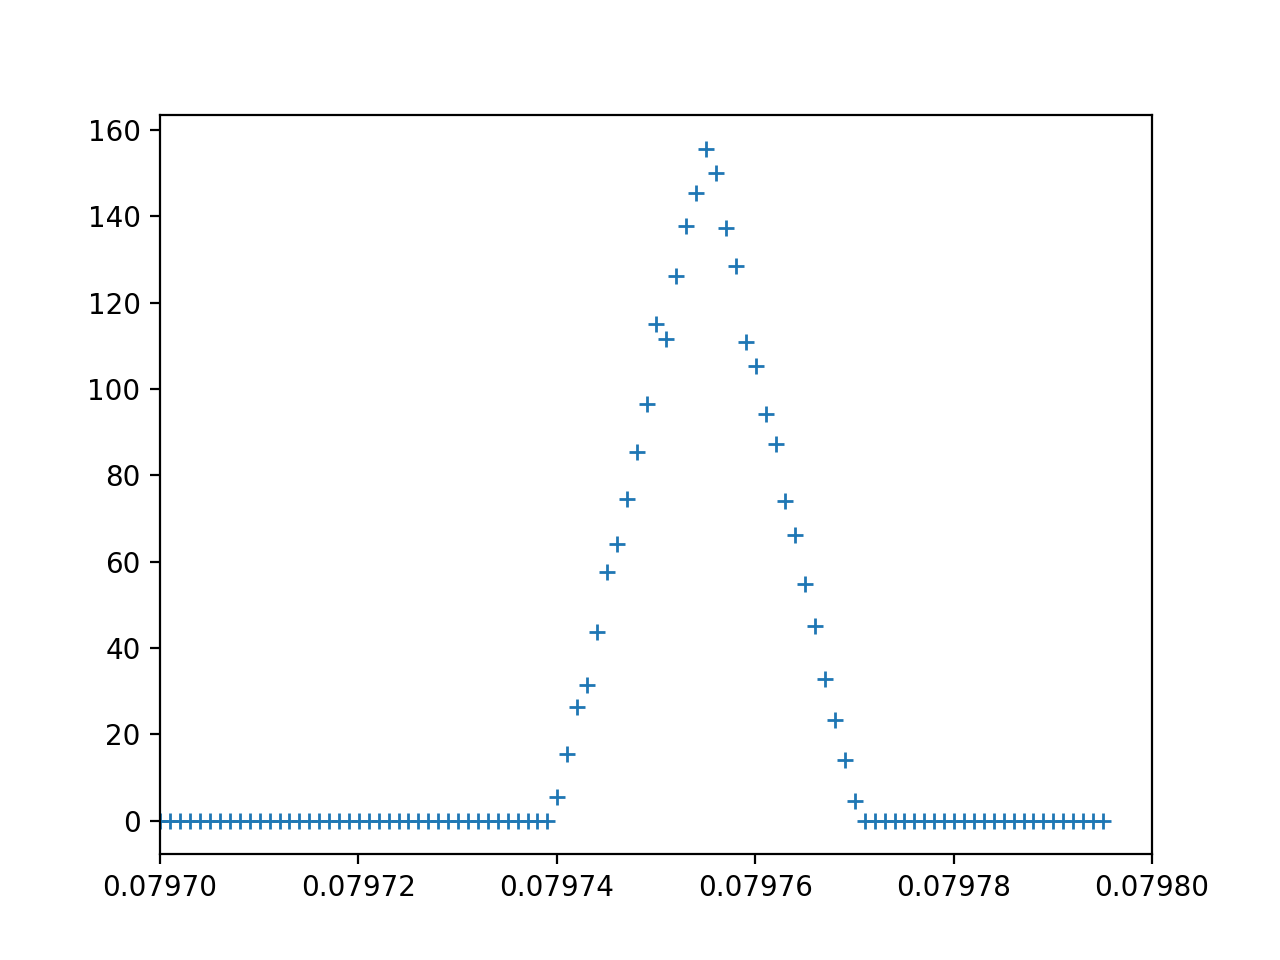

(0.0797, 0.0798)

In [24]:
plt.figure()
m3 = hh.load('%s/_m2sout/tof3a.h5' % beamdir)
plt.plot(m3.tof, m3.I, '+')
plt.xlim(0.0797, 0.0798)

# Ei=20meV high resolution

In [30]:
beamdir = os.path.abspath("Ei_20meV_AnalyticMod_MoreCounts/beam-Ei_20-fluxmode_2.0/")
#!rm -rf {beamdir}
!mkdir -p {beamdir}

In [26]:
%%time
run_script.run_mpi(
    './CNCS_Dec_2016_py_mcvine.py', 
    '%s/_m2sout' % beamdir,
    ncount=1e9, nodes=20,
    Ei=20, Erange_fraction=0.04,
    fluxmode=2.0, f41=180., f42=180.
)

CPU times: user 4.83 ms, sys: 76.5 ms, total: 81.3 ms
Wall time: 32min 24s


Run postprocessing so that this works with other apps such as resolution calculation

In [27]:
from mcvine.instruments.CNCS import beam_postprocessing as bpp

In [28]:
bpp.run(
    '%s/_m2sout/' % beamdir, 
    '%s/out' % beamdir,
    Ei=20.
)

Running beam monitors...
 -> running mcvine_analyze_beam --output-dir=./Ei_20meV_AnalyticMod_MoreCounts/beam-Ei_20-fluxmode_2.0/out --ncount=22305 --buffer_size=22305 --geometer.source="((0,0,-0.15),(0,0,0))" --source.path=./Ei_20meV_AnalyticMod_MoreCounts/beam-Ei_20-fluxmode_2.0/_m2sout/neutrons --monitor.mtof.tofmin=0.016685186977609453 --monitor.mtof.tofmax=0.02039300630596711 --monitor.mtof.ntof=1000 --monitor.menergy.energymin=18.0 --monitor.menergy.energymax=22.0 --monitor.menergy.nenergy=1000...
done.


In [32]:
!mcvine neutronstorage count {beamdir}/out/neutrons

22305


<IPython.core.display.Javascript object>


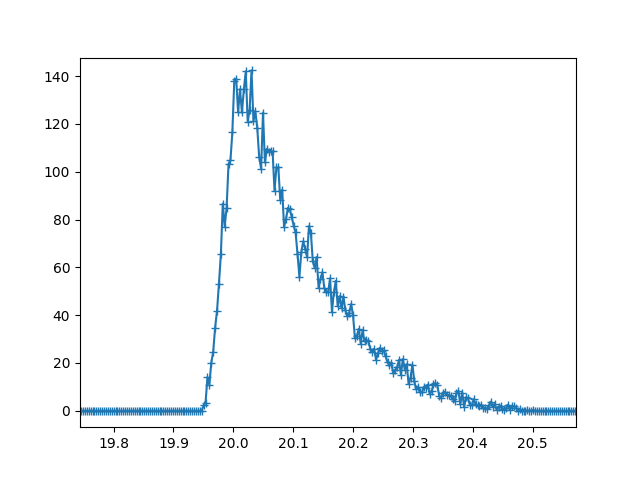

(19, 22)

In [33]:
plt.figure()
IE = hh.load('%s/_m2sout/beam_I_E.h5' % beamdir)
plt.plot(IE.energy, IE.I, '+-')
plt.xlim(19, 22)

<IPython.core.display.Javascript object>


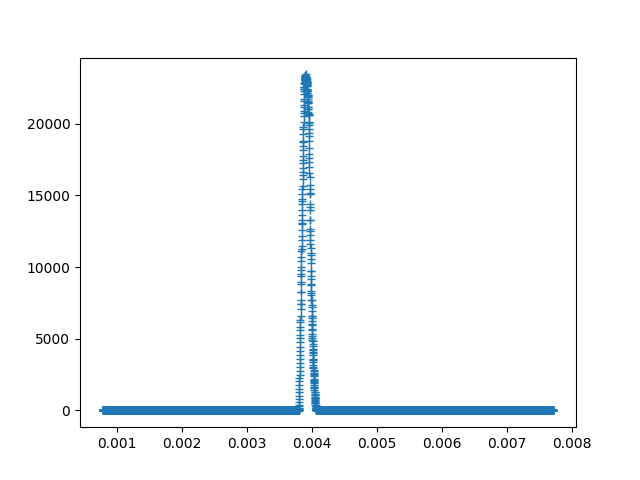

In [35]:
plt.figure()
m2 = hh.load('%s/_m2sout/tof2.h5' % beamdir)
plt.plot(m2.tof, m2.I, '+')
# plt.xlim(0.0165, 0.0179)

<IPython.core.display.Javascript object>


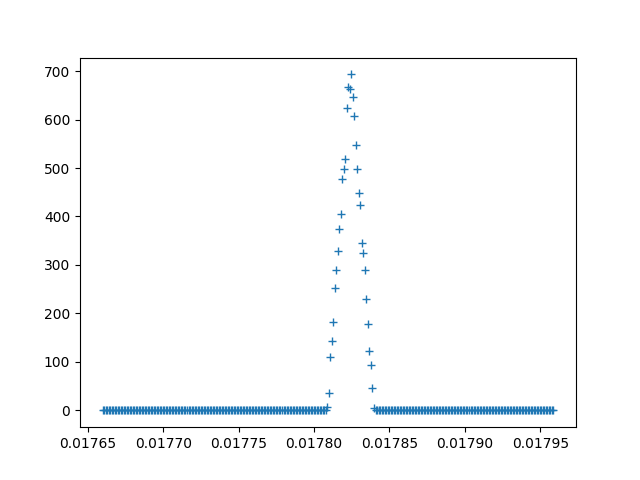

In [36]:
plt.figure()
m3 = hh.load('%s/_m2sout/tof3a.h5' % beamdir)
plt.plot(m3.tof, m3.I, '+')
# plt.xlim(0.0797, 0.0798)

In [37]:
mons = msa.LoadNexusMonitors("/SNS/CNCS/IPTS-20360/nexus/CNCS_274512.nxs.h5")

In [38]:
msa.Rebin(InputWorkspace='mons', OutputWorkspace='mons', Params="%s,%s,%s" % (0, 1., 80000))

EventWorkspace
Title: V-foil HR, T=300 K, Ei=20.43628 meV
Histograms: 2
Bins: 80000
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: CNCS (2017-Aug-07 to 2100-Jan-31)Instrument from: /SNS/CNCS/IPTS-20360/nexus/CNCS_274512.nxs.h5

Parameters from: /SNS/users/lj7/.mantid/instrument/CNCS_Parameters.xml
Run start: 2018-Jun-07 23:55:19
Run end:  2018-Jun-08 00:35:09

Events: 26733067

In [39]:
mons.getNumberHistograms()

2

In [41]:
exp_m1 = msa.CropWorkspace(mons, StartWorkspaceIndex = 1, EndWorkspaceIndex = 1)

In [42]:
exp_m0 = msa.CropWorkspace(mons, StartWorkspaceIndex = 0, EndWorkspaceIndex = 0)

<IPython.core.display.Javascript object>


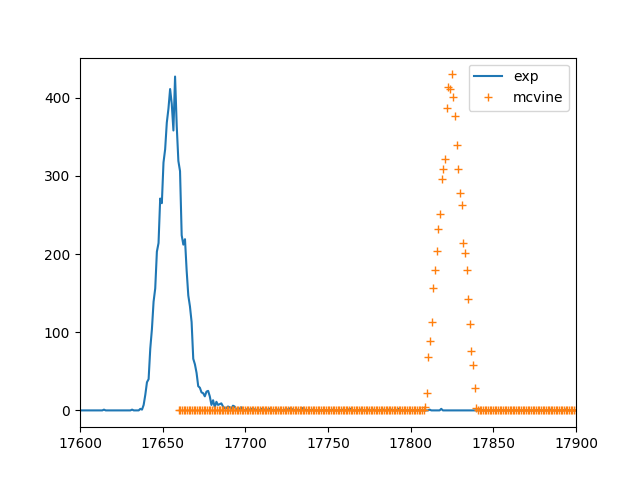

(17600, 17900)

In [46]:
xbb = exp_m1.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m1.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m3.tof*1e6, m3.I*.62, '+', label='mcvine')
plt.legend()
plt.xlim(17600, 17900)

<IPython.core.display.Javascript object>


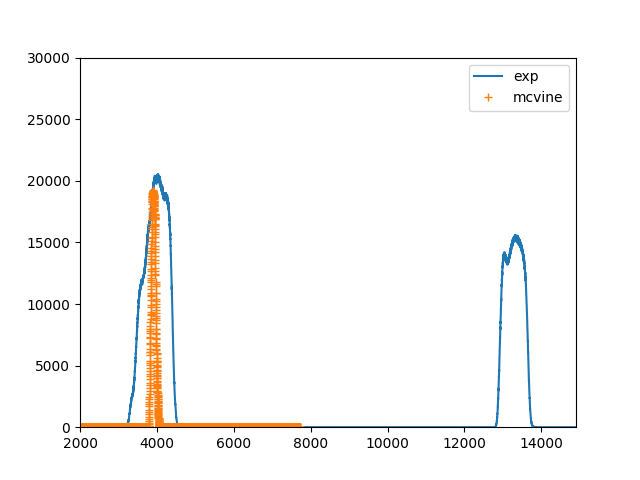

(0, 30000)

In [49]:
xbb = exp_m0.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m0.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m2.tof*1e6, m2.I*.82, '+', label='mcvine')
plt.legend()
plt.xlim(2000, 14900)
plt.ylim(0, 30000)

# Ei=80meV high resolution

In [31]:
Ei=80.
# high res
fluxmode = 2.0; f4 = 180.
ncount=1e10
nodes = 20
Erange_fraction= 0.04

In [7]:
beamdir = os.path.abspath(
    "Ei_{Ei}meV_AnalyticMod_MoreCounts/beam-Ei_{Ei}-fluxmode_{fluxmode}/".format(Ei=Ei, fluxmode=fluxmode) )

In [30]:
# !rm -rf {beamdir}
!mkdir -p {beamdir}

In [32]:
%%time
run_script.run_mpi(
    './CNCS_Dec_2016_py_mcvine.py', 
    '%s/_m2sout' % beamdir,
    ncount=ncount, nodes=nodes,
    Ei=Ei, Erange_fraction=Erange_fraction,
    fluxmode=fluxmode, f41=f4, f42=f4
)

CPU times: user 6.29 ms, sys: 75.2 ms, total: 81.5 ms
Wall time: 1h 6min 56s


Run postprocessing so that this works with other apps such as resolution calculation

In [33]:
from mcvine.instruments.CNCS import beam_postprocessing as bpp

In [34]:
%%time
bpp.run(
    '%s/_m2sout/' % beamdir, 
    '%s/out' % beamdir,
    Ei=Ei
)

Running beam monitors...
 -> running mcvine_analyze_beam --output-dir=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_80.0meV_AnalyticMod_MoreCounts/beam-Ei_80.0-fluxmode_2.0/out --ncount=115328 --buffer_size=115328 --geometer.source="((0,0,-0.15),(0,0,0))" --source.path=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_80.0meV_AnalyticMod_MoreCounts/beam-Ei_80.0-fluxmode_2.0/_m2sout/neutrons --monitor.mtof.tofmin=0.008342593488804726 --monitor.mtof.tofmax=0.010196503152983556 --monitor.mtof.ntof=1000 --monitor.menergy.energymin=72.0 --monitor.menergy.energymax=88.0 --monitor.menergy.nenergy=1000...
done.
CPU times: user 553 ms, sys: 49.1 ms, total: 602 ms
Wall time: 16.2 s


In [35]:
!mcvine neutronstorage count {beamdir}/out/neutrons

115328


<IPython.core.display.Javascript object>


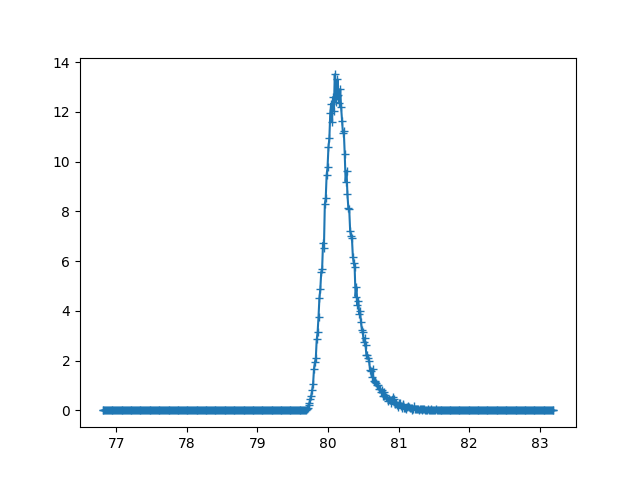

In [36]:
plt.figure()
IE = hh.load('%s/_m2sout/beam_I_E.h5' % beamdir)
plt.plot(IE.energy, IE.I, '+-')
# plt.xlim(19, 22)

<IPython.core.display.Javascript object>


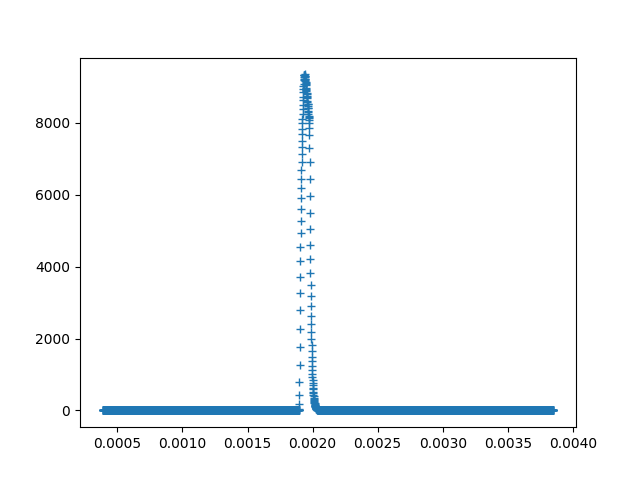

In [37]:
plt.figure()
m2 = hh.load('%s/_m2sout/tof2.h5' % beamdir)
plt.plot(m2.tof, m2.I, '+')
# plt.xlim(0.0165, 0.0179)

<IPython.core.display.Javascript object>


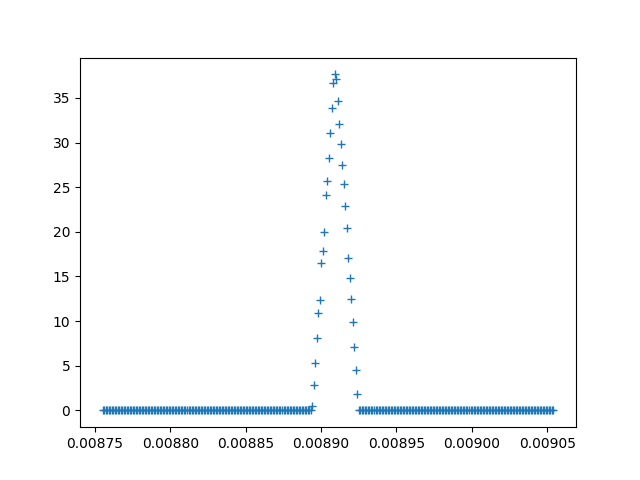

In [38]:
plt.figure()
m3 = hh.load('%s/_m2sout/tof3a.h5' % beamdir)
plt.plot(m3.tof, m3.I, '+')
# plt.xlim(0.0797, 0.0798)

In [19]:
mons = msa.LoadNexusMonitors("/SNS/CNCS/IPTS-20360/nexus/CNCS_274510.nxs.h5")

In [20]:
msa.Rebin(InputWorkspace='mons', OutputWorkspace='mons', Params="%s,%s,%s" % (0, 1., 80000))

EventWorkspace
Title: V-foil HR, T=300 K, Ei=81.74512 meV
Histograms: 2
Bins: 80000
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: CNCS (2017-Aug-07 to 2100-Jan-31)Instrument from: /SNS/CNCS/IPTS-20360/nexus/CNCS_274510.nxs.h5

Parameters from: /SNS/users/lj7/.mantid/instrument/CNCS_Parameters.xml
Run start: 2018-Jun-07 22:35:43
Run end:  2018-Jun-07 23:14:57

Events: 11759788

In [21]:
mons.getNumberHistograms()

2

In [22]:
exp_m1 = msa.CropWorkspace(mons, StartWorkspaceIndex = 1, EndWorkspaceIndex = 1)

In [23]:
exp_m0 = msa.CropWorkspace(mons, StartWorkspaceIndex = 0, EndWorkspaceIndex = 0)

<IPython.core.display.Javascript object>


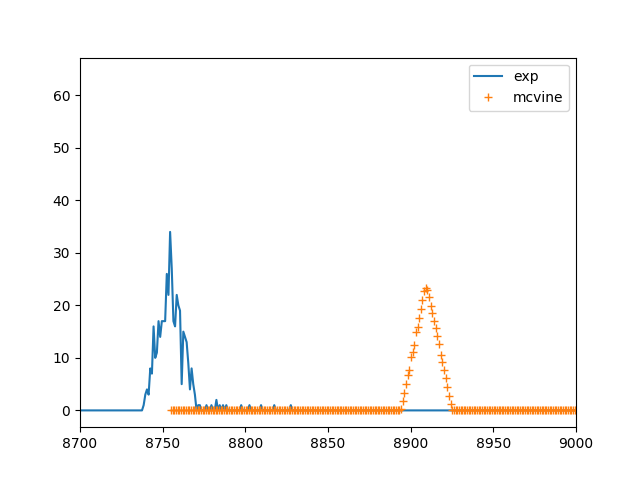

(8700, 9000)

In [39]:
xbb = exp_m1.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m1.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m3.tof*1e6, m3.I*.62, '+', label='mcvine')
plt.legend()
plt.xlim(8700, 9000)

<IPython.core.display.Javascript object>


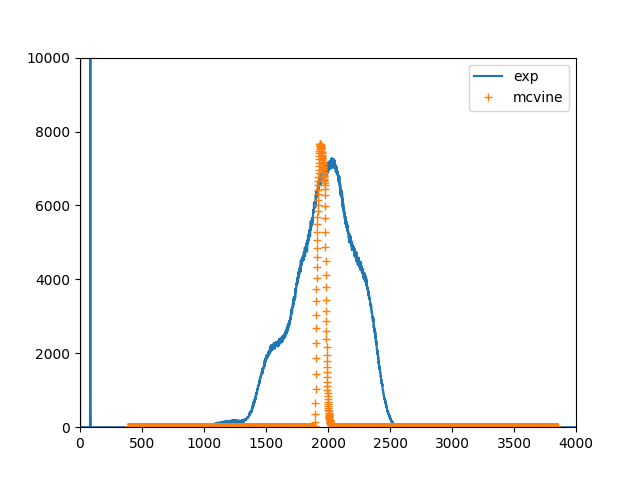

(0, 10000)

In [40]:
xbb = exp_m0.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m0.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m2.tof*1e6, m2.I*.82, '+', label='mcvine')
plt.legend()
plt.xlim(0, 4000)
plt.ylim(0, 10000)

# More simulations

In [7]:
beamdir_template = "Ei_{Ei}meV_AnalyticMod_MoreCounts/beam-Ei_{Ei}-fluxmode_{fluxmode}/"
# high res
fluxmode = 2.0; f4 = 180.
ncount=3e9
nodes = 10
Erange_fraction= 0.04

In [10]:
Eis = [2., 4., 6, 8, 10, 14, 35, 50, 65]

In [8]:
import time
from mcvine.instruments.CNCS import beam_postprocessing as bpp

In [ ]:
for Ei in Eis:
    print Ei
    beamdir = os.path.abspath(beamdir_template.format(Ei=Ei, fluxmode=fluxmode) )
    if os.path.exists(beamdir): continue
    !mkdir -p {beamdir}
    tstart = time.time()
    run_script.run_mpi(
        './CNCS_Dec_2016_py_mcvine.py', 
        '%s/_m2sout' % beamdir,
        ncount=ncount, nodes=nodes,
        Ei=Ei, Erange_fraction=Erange_fraction,
        fluxmode=fluxmode, f41=f4, f42=f4
    )
    tend = time.time()
    print "Took %s seconds" % (tend-tstart,)
    print
    print "Run post-processing"
    bpp.run(
        '%s/_m2sout/' % beamdir, 
        '%s/out' % beamdir,
        Ei=Ei
    )
    !time rm -rf {beamdir}/_m2sout/rank*-step*
    continue

2.0
4.0
Took 2630.44087291 seconds

Run post-processing
Running beam monitors...
 -> running mcvine_analyze_beam --output-dir=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_4.0meV_AnalyticMod_MoreCounts/beam-Ei_4.0-fluxmode_2.0/out --ncount=82265 --buffer_size=82265 --geometer.source="((0,0,-0.15),(0,0,0))" --source.path=/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine/Ei_4.0meV_AnalyticMod_MoreCounts/beam-Ei_4.0-fluxmode_2.0/_m2sout/neutrons --monitor.mtof.tofmin=0.037309212299229 --monitor.mtof.tofmax=0.04560014836572433 --monitor.mtof.ntof=10000 --monitor.menergy.energymin=3.6 --monitor.menergy.energymax=4.4 --monitor.menergy.nenergy=10000...
done.

real	0m55.671s
user	0m0.321s
sys	0m3.556s
6


In [52]:
ls

a1Gw2-5-f5.dat                            Ei_4.0meV_AnalyticMod_MoreCounts/
beam-fc-fwhms.txt                         Ei_50meV_AnalyticMod_MoreCounts/
beam-fwhms-SNS_source_r1.txt              Ei_65meV_AnalyticMod_MoreCounts/
beam-fwhms.txt                            Ei_6meV_AnalyticMod_MoreCounts/
beam_I_E.dat                              Ei_80.0meV_AnalyticMod_MoreCounts/
CNCS_Dec_2016_py_mcvine-autogenerated.py  Ei_8meV_AnalyticMod_MoreCounts/
CNCS_Dec_2016_py_mcvine.py                E_mon_0.dat
CNCS_Dec_2016_py_mcvine.pyc               emon.dat
debug/                                    E_mon.dat
Ei_10meV_AnalyticMod_MoreCounts/          Itof.dat
Ei_14meV_AnalyticMod_MoreCounts/          mcvine_run_script_kwds.yml
Ei_1meV/                                  out/
Ei_1meV_AnalyticMod_MoreCounts/           output/
Ei_1meV_check_monitors/                   out-test-SNS-analytic/
Ei_20meV/                                 SNS_IRP2_TD_BL5_0o100p_fit_fit.dat
Ei_2.0meV_AnalyticMod_MoreCounts/